In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [5]:
from super_image_resolution.utils import load

In [10]:
hparams = load(
    "/home/mittal.nit/projects/super_image_resolution/assets/"
    "pcgan_wsi_patches_64to256/version_1/hparams/hparams.p")
metrics = load(hparams["metrics_path"])


Successfully loaded /home/mittal.nit/projects/super_image_resolution/assets/pcgan_wsi_patches_64to256/version_1/hparams/hparams.p

Successfully loaded /home/mittal.nit/projects/super_image_resolution/assets/pcgan_wsi_patches_64to256/version_1/metrics/metrics.p


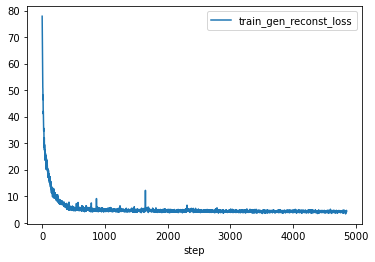

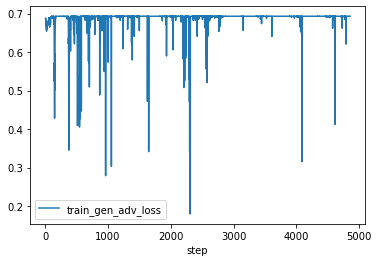

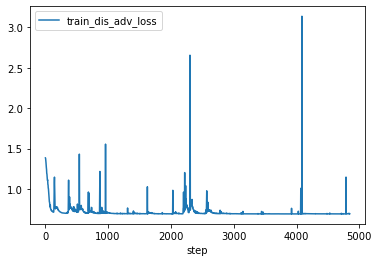

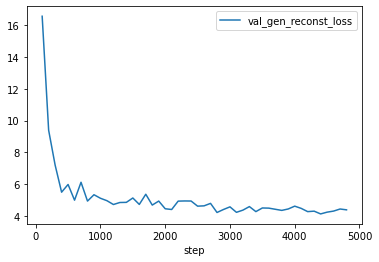

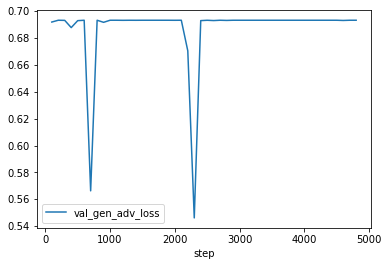

In [11]:
modes = ["train", "val"]
for mode in metrics.keys():
    if mode in modes:
        for loss_type, values in metrics[mode].items():
            loss_type = f"{mode}_{loss_type}"
            loss = pd.DataFrame(values, columns=["step", loss_type])
            loss.set_index("step", inplace=True)
            if len(loss) > 0:
                loss = loss.groupby("step").mean()
                loss.plot()